In [4]:
import numpy as np
import csv
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
heartDisease = pd.read_csv('/home/lycinthus/Documents/python/AI/heart.csv')
heartDisease = heartDisease.replace('?', np.nan)

In [7]:

heartDisease['age'] = pd.cut(heartDisease['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100],
                             labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

In [8]:
print('Few examples from the dataset are given below')
print(heartDisease.head())

Few examples from the dataset are given below
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  50-60    1   0       125   212    0        1      168      0      1.0   
1  50-60    1   0       140   203    1        0      155      1      3.1   
2  60-70    1   0       145   174    0        1      125      1      2.6   
3  60-70    1   0       148   203    0        1      161      0      0.0   
4  60-70    0   0       138   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


In [11]:
model = BayesianNetwork([('age', 'trestbps'), ('age', 'fbs'),
                         ('sex', 'trestbps'), ('exang', 'trestbps'),
                         ('trestbps', 'target'), ('fbs', 'target'),
                         ('target', 'restecg'), ('target', 'thalach'),
                         ('target', 'chol')])


In [14]:
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

print('\n1. Probability of Heart Disease given Age=30-40')
q = HeartDisease_infer.query(variables=['target'], evidence={'age': '30-40'})
print(q.values[0])

print("\nUnique values of 'chol':")
print(heartDisease['chol'].unique())

print('\n2. Probability of Heart Disease given cholesterol=233')
q = HeartDisease_infer.query(variables=['target'], evidence={'chol': 233})
print(q.values[0])


Learning CPD using Maximum likelihood estimators

Inferencing with Bayesian Network:

1. Probability of Heart Disease given Age=30-40
0.36563906372372007

Unique values of 'chol':
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]

2. Probability of Heart Disease given cholesterol=233
0.23763468436725702


In [17]:
edges = [('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('exang', 'trestbps'),
         ('trestbps', 'target'), ('fbs', 'target'), ('target', 'restecg'),
         ('target', 'thalach'), ('target', 'chol')]


In [18]:
G = nx.DiGraph()


G.add_edges_from(edges)

In [19]:
edges = [('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('exang', 'trestbps'),
         ('trestbps', 'target'), ('fbs', 'target'), ('target', 'restecg'),
         ('target', 'thalach'), ('target', 'chol')]


G = nx.DiGraph()

G.add_edges_from(edges)

colors = {'age': 'red', 'trestbps': 'blue', 'fbs': 'green', 'sex': 'yellow',
          'exang': 'purple', 'target': 'orange', 'restecg': 'pink',
          'thalach': 'gray', 'chol': 'cyan'}


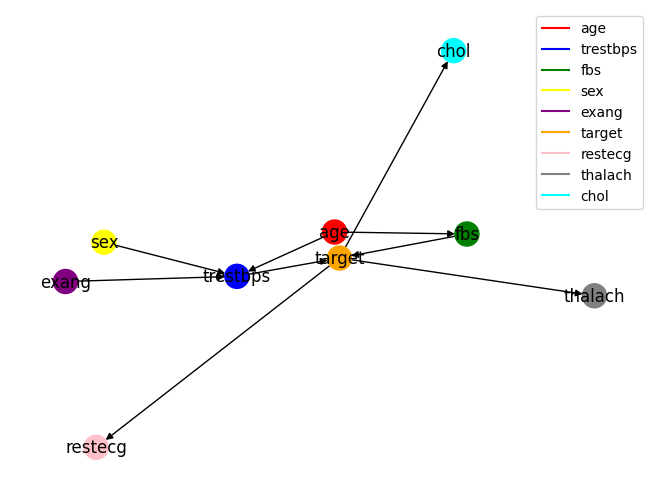

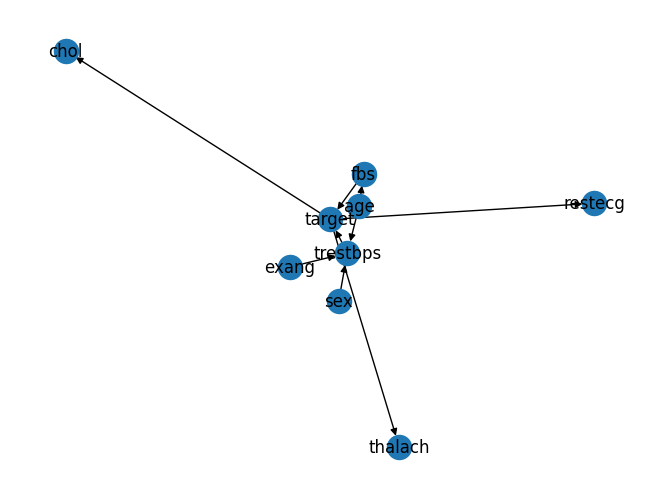

In [20]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[colors[node] for node in G.nodes])

for label, color in colors.items():
    plt.plot([0], [0], color=color, label=label)
plt.legend()

plt.show()

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()
